In [1]:
!pip install --upgrade pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 35.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 57.8 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 21.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [7]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [5]:
def get_data_yf(stocks, startDate):
    data = yf.download(stocks,startDate)['Close']
    returns = data.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return returns,meanReturns, covMatrix

tickers_list = ['AAPL','META', 'GOOG', 'PINS']

endDate = dt.datetime.now()
startDate = endDate -dt.timedelta(days = 300)

returns, meanReturns, covMatrix = get_data_yf(tickers_list, startDate)
print(meanReturns)

[*********************100%%**********************]  4 of 4 completed

Ticker
AAPL   -0.000531
GOOG    0.001466
META    0.002396
PINS    0.001185
dtype: float64


In [6]:
weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)
print(weights)

[0.39822799 0.18988942 0.13740016 0.27448244]


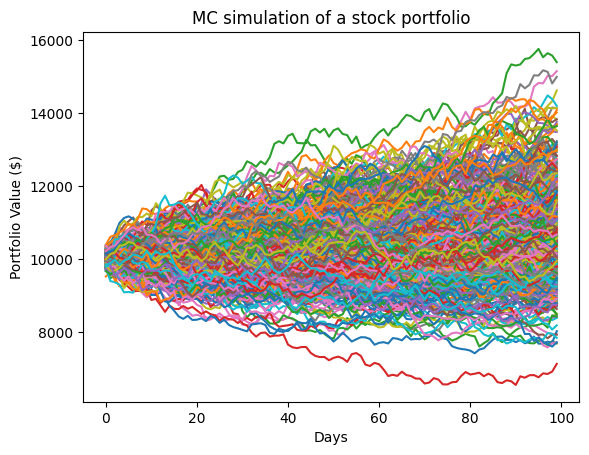

In [8]:
#monte carlo method
mc_sims = 400 # number of simulations
T = 100 #timeframe in days
# mean matrix # how many stocks and days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

initialPortfolio = 10000
for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC simulation of a stock portfolio')
plt.show()